<a href="https://colab.research.google.com/github/Laaliji/Colon-Cancer-Gene-Expression-Data-Classification-Analysis/blob/main/Colon_Cancer_Gene_Expression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Colon Cancer Gene Expression Activity**

Colon cancer remains a major global health challenge, requiring precise diagnostic tools. Gene expression profiling, combined with machine learning, enables the identification of cancer biomarkers. This project analyzes the "Gene Expression of Colon Cancer" dataset (60 genes) to:
1. Compare five models—logistic regression, SVM, k-NN, decision tree, and random forest—for classification.
2. Identify influential genes based on each model’s mechanism (e.g., coefficients, feature importance).
3. Conduct a comparative analysis to determine the best prediction for a new patient.

Results will support an article for Nordic Machine Intelligence (NMI) journal.

*   **Supervision:** Dr. O. BANOUAR, Faculty of Sciences and Techniques, Cadi Ayyad University, Marrakech.
*   **Realized by:** Zakariae LAALIJI.



## **Libraries and Configurations**

This section imports the necessary Python libraries and configures the environment for analyzing the "Gene Expression of Colon Cancer" dataset. Libraries such as pandas, scikit-learn, and matplotlib are used for data processing, machine learning, and visualization, enabling model training, gene importance analysis, and comparative evaluation. Configurations ensure reproducibility and consistency throughout the analysis.

In [59]:
from google.colab import drive # Import the necessary library for Google Drive integration
drive.mount('/content/drive') # Mount your Google Drive to the '/content/drive' directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import os #for operating system related tasks

# Specifying the path
datasets_folder_path = '/content/drive/My Drive/Datasets_For_Research'

# Printing the contents of the 'Datasets_For_Research' folder
print(os.listdir(datasets_folder_path))  # to list files and directories

['goodreads_books.csv', 'BX-Book-Ratings.csv', 'BX-Users.csv', 'BX_Books.csv', 'colon_cancer.csv', 'missing_values_heatmap.png', 'class_distribution.png']


In [61]:
import pandas as pd # For data manipulation and analysis using DataFrames
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler # For feature scaling (standardization)
from sklearn.linear_model import LogisticRegression # For logistic regression model
from sklearn.neighbors import KNeighborsClassifier # For k-nearest neighbors model
from sklearn.inspection import DecisionBoundaryDisplay # For visualizing decision boundaries
from sklearn.tree import DecisionTreeClassifier # For Decision Tree
from sklearn.decomposition import PCA # For dimensions reduction
from sklearn.manifold import TSNE  # Import t-SNE for dimensionality reduction
from sklearn.ensemble import RandomForestClassifier # For Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay # For model evaluation metrics
from sklearn.model_selection import cross_val_score # For cross-validation
from sklearn.svm import SVC # For Support Vector Machine model
import seaborn as sns # For data visualization
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For plotting graphs

## **Data preparation**

This section prepares the "Gene Expression of Colon Cancer" dataset for analysis. Tasks include loading the dataset, handling missing values, standardizing the 60 gene expression features, and splitting the data into training and test sets. These steps ensure the data is clean, consistent, and ready for training machine learning models and evaluating gene importance.

### **Exploratory Data Analysis**

This subsection examines the "Gene Expression of Colon Cancer" dataset to understand its characteristics, including class distribution and gene expression feature distributions. Visualizations and summary statistics help identify patterns, imbalances, or anomalies, informing subsequent preprocessing and model selection.

**Why EDA?** Exploratory Data Analysis (EDA) helps understand the dataset’s structure, distributions, and patterns (e.g., gene expression ranges, class distribution). It guides preprocessing and model selection by revealing issues like outliers or imbalances.

In [62]:
# Specify the dataset path
file_path = '/content/drive/My Drive/Datasets_For_Research/colon_cancer.csv'

# Load the dataset
data = pd.read_csv(file_path, sep=';')

# Display basic information
print("Dataset Shape:", data.shape)
print("\nColumn Names:", data.columns.tolist())
print("\nData Types:\n", data.dtypes)

# Display first few rows
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

Dataset Shape: (804, 62)

Column Names: ['id_sample', 'ADH1C', 'DHRS11', 'UGP2', 'SLC7A5', 'CTSS', 'DAO', 'NIBAN1', 'PRUNE2', 'FOXF2', 'TENT5C', 'KLF10', 'FABP1', 'RPSAP19', 'NCAPH', 'TPM1', 'PLA2G12B', 'PLAAT4', 'IGLV8-61', 'GSS', 'L1TD1', 'RNF186', 'HES2', 'MXRA8', 'SOX18', 'NDFIP2', 'SIAE', 'NEURL1B', 'DDIT4', 'TRPM4', 'RETREG1', 'OTULINL', 'CPVL', 'SAMD9', 'ANKRD40CL', 'EPN3', 'CRYBG2', 'GIPC2', 'P3H2', 'STEAP3', 'THNSL2', 'TRAPPC14', 'RHBDL2', 'RPP25', 'SEMA4C', 'RNF43', 'EPS8L1', 'TOR4A', 'PAQR5', 'SIDT1', 'ESRP1', 'SYTL2', 'BSPRY', 'CDHR2', 'ERRFI1', 'CLIC5', 'PLLP', 'GAL', 'CRYL1', 'YBX2', 'ANGPTL4', 'tissue_status']

Data Types:
 id_sample         object
ADH1C            float64
DHRS11           float64
UGP2             float64
SLC7A5           float64
                  ...   
GAL              float64
CRYL1            float64
YBX2             float64
ANGPTL4          float64
tissue_status     object
Length: 62, dtype: object

First 5 Rows of the Dataset:
         id_sample    

The dataset contains 804 samples and 62 columns: 1 sample ID (id_sample), 60 gene expression features (e.g., ADH1C, SLC7A5, RNF43), and 1 target column (tissue_status, binary: normal/cancer). Gene expression values are float64, while id_sample and tissue_status are object. The dataset is sizable, supporting robust model training, but the target distribution (not fully shown) needs checking for class balance. The gene expression ranges (e.g., SLC7A5: 2.36–7.06 in the first 5 rows) suggest standardization is required for scale-sensitive models like SVM and k-NN.

Missing Values Count:
 id_sample        0
ADH1C            0
DHRS11           0
UGP2             0
SLC7A5           0
                ..
GAL              0
CRYL1            0
YBX2             0
ANGPTL4          0
tissue_status    0
Length: 62, dtype: int64

Missing Values Percentage:
 id_sample        0.0
ADH1C            0.0
DHRS11           0.0
UGP2             0.0
SLC7A5           0.0
                ... 
GAL              0.0
CRYL1            0.0
YBX2             0.0
ANGPTL4          0.0
tissue_status    0.0
Length: 62, dtype: float64

No missing values found in the dataset.


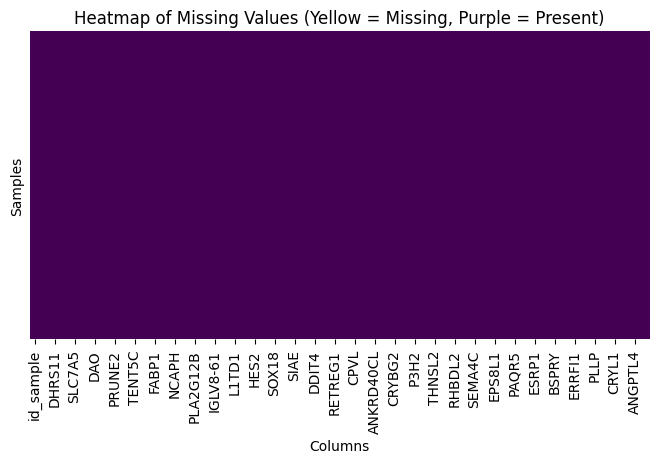

In [63]:
# Check for missing values
print("Missing Values Count:\n", data.isnull().sum())
print("\nMissing Values Percentage:\n", (data.isnull().sum() / len(data) * 100).round(2))

# Analyze missing values
missing_cols = data.columns[data.isnull().any()].tolist()
if missing_cols:
    print("\nColumns with Missing Values:", missing_cols)
    print("Number of Columns with Missing Values:", len(missing_cols))
    print("Total Missing Values:", data.isnull().sum().sum())
else:
    print("\nNo missing values found in the dataset.")

# Visualize missing values with a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values (Yellow = Missing, Purple = Present)")
plt.xlabel("Columns")
plt.ylabel("Samples")
plt.savefig('/content/drive/My Drive/Datasets_For_Research/missing_values_heatmap.png')
plt.show()


No missing values are present in the dataset (804 samples, 62 columns). This eliminates imputation needs, ensuring reliable data for model training and gene importance analysis.

**Why Check Missing Values?** Checking missing values ensures data completeness. Missing data can bias models, so identifying and handling them (e.g., imputation) guarantees reliable training and analysis.

Class Distribution:
tissue_status
normal     402
tumoral    402
Name: count, dtype: int64


<ipython-input-64-1b0b5053b61f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="tissue_status", data=data, palette='viridis')


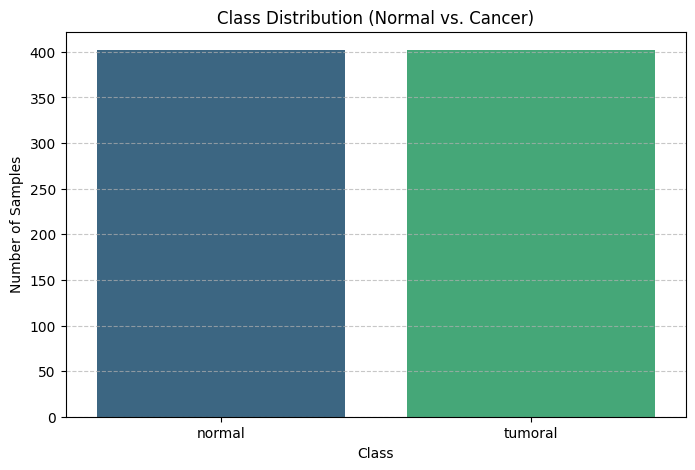


Class Percentage:
tissue_status
normal     50.0
tumoral    50.0
Name: proportion, dtype: float64


In [64]:
# Class distribution count
print("Class Distribution:")
print(data["tissue_status"].value_counts())

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x="tissue_status", data=data, palette='viridis')
plt.title("Class Distribution (Normal vs. Cancer)")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('/content/drive/My Drive/Datasets_For_Research/class_distribution.png')
plt.show()

# Class percentage
print("\nClass Percentage:")
print(data["tissue_status"].value_counts(normalize=True) * 100)

The dataset has a perfectly balanced class distribution, with 402 normal and 402 tumoral samples (50% each). This balance supports robust model training without requiring resampling techniques, ensuring fair evaluation of the five machine learning models.

**Why Check Class Equality?** Checking if classes are equal (e.g., normal vs. tumoral) assesses balance. Balanced classes ensure fair model training, while imbalance may require techniques like oversampling to prevent biased predictions.

In [65]:
# Descriptive Analysis
# Drop id_sample and tissue_status for statistics (not relevant)
features = data.drop(columns=["id_sample", "tissue_status"])

# Descriptive statistics
print("Descriptive Statistics of Gene Expression Features (Before Standardization):")
print(features.describe())


Descriptive Statistics of Gene Expression Features (Before Standardization):
            ADH1C      DHRS11        UGP2      SLC7A5        CTSS         DAO  \
count  804.000000  804.000000  804.000000  804.000000  804.000000  804.000000   
mean     5.588943    4.354817    5.557694    4.513570    6.717535    7.218184   
std      2.889901    1.431179    1.150565    1.614450    1.077821    1.411969   
min      0.610504    1.427079    2.027201    1.685024    3.668691    1.164886   
25%      3.174250    3.118844    4.611060    3.030022    6.065937    6.241714   
50%      5.467024    4.125990    5.412204    4.382953    6.762908    7.578782   
75%      8.444756    5.696566    6.556969    5.918848    7.485487    8.263561   
max     10.263846    7.022241    7.571114    8.059430    8.990703   10.079135   

           NIBAN1      PRUNE2       FOXF2      TENT5C  ...       SYTL2  \
count  804.000000  804.000000  804.000000  804.000000  ...  804.000000   
mean     2.737937    2.806573    3.064394    

Descriptive analysis of the 60 gene expression features shows diverse ranges (e.g., SLC7A5: 1.69–8.06, DAO: 1.16–10.08) and high variability (e.g., ADH1C mean: 5.59, std: 2.89; SLC7A5 std: 1.61), **highlighting the need for standardization to ensure scale-sensitive models (SVM, k-NN) perform effectively.** It reveals distribution patterns, detects potential outliers, and informs feature selection by identifying variable genes, supporting robust model training and interpretation.

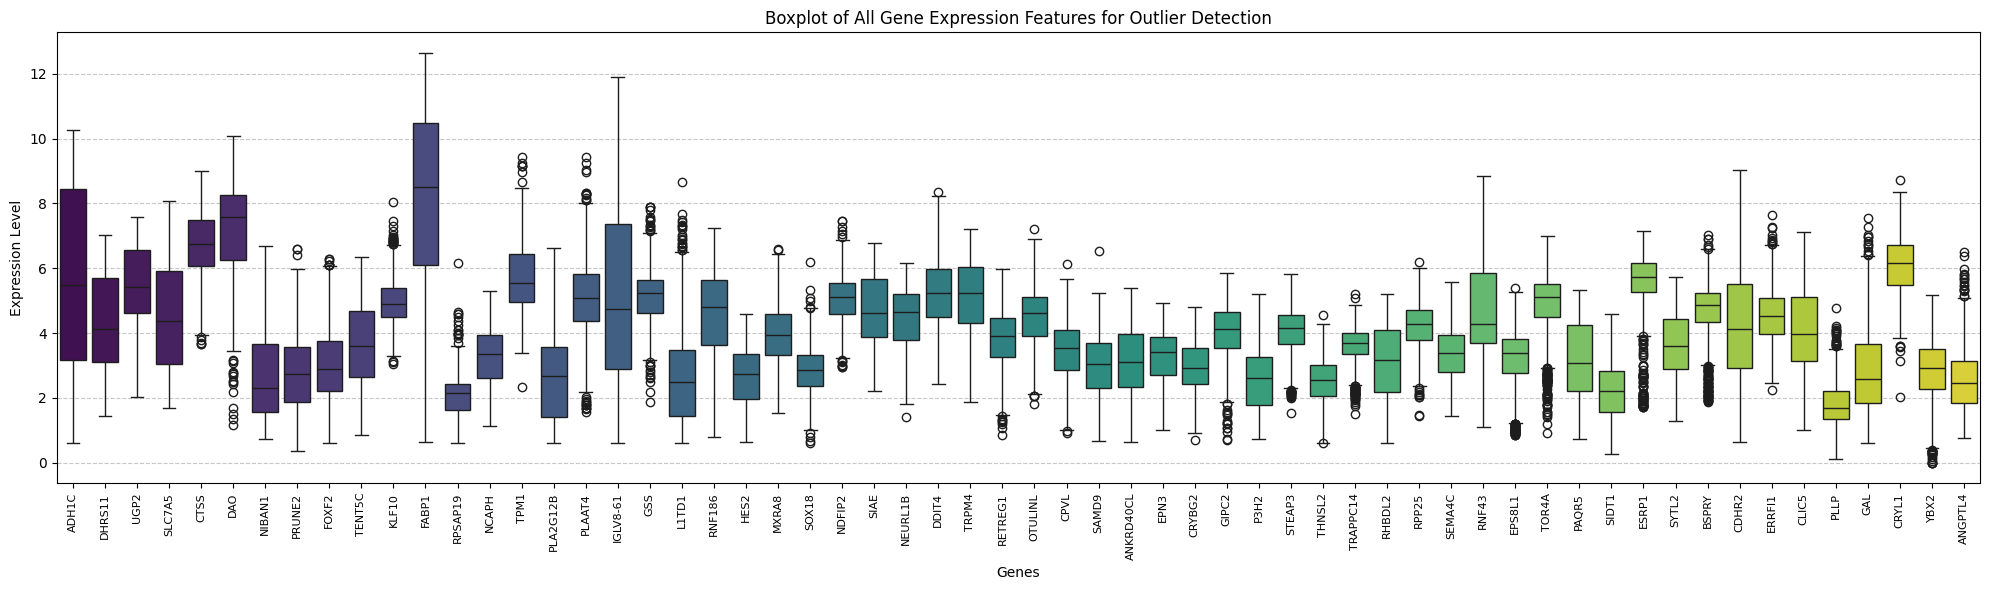

In [66]:
# Select gene expression features (exclude id_sample and tissue_status)
features = data.drop(columns=["id_sample", "tissue_status"])

# Boxplot for all 60 genes
plt.figure(figsize=(20, 6))
sns.boxplot(data=features, palette='viridis')
plt.title("Boxplot of All Gene Expression Features for Outlier Detection")
plt.xlabel("Genes")
plt.ylabel("Expression Level")
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The boxplot of all 60 gene expression features reveals varied distributions, with several genes (e.g., early ones like ADH1C, DHRS11) showing significant outliers beyond the whiskers (>1.5 IQR), indicating extreme expression values. Later genes (e.g., SYTL2, ANGPTL4) have fewer outliers, suggesting more consistent expression. These outliers may impact model performance, potentially requiring preprocessing like clipping or robust scaling.

In [67]:
# Function to count outliers using IQR method
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)].count()
    return outliers

# Calculate outliers for each gene
outlier_counts = features.apply(count_outliers)

# Display results
print("Number of Outliers per Gene:")
print(outlier_counts)

Number of Outliers per Gene:
ADH1C         0
DHRS11        0
UGP2          0
SLC7A5        0
CTSS          5
DAO          15
NIBAN1        0
PRUNE2        3
FOXF2         7
TENT5C        0
KLF10        23
FABP1         0
RPSAP19      16
NCAPH         0
TPM1          8
PLA2G12B      0
PLAAT4       25
IGLV8-61      0
GSS          26
L1TD1        19
RNF186        0
HES2          0
MXRA8         2
SOX18        10
NDFIP2       13
SIAE          0
NEURL1B       1
DDIT4         1
TRPM4         0
RETREG1       8
OTULINL       5
CPVL          3
SAMD9         1
ANKRD40CL     0
EPN3          0
CRYBG2        1
GIPC2        16
P3H2          0
STEAP3       18
THNSL2        2
TRAPPC14     41
RHBDL2        0
RPP25        11
SEMA4C        0
RNF43         0
EPS8L1       41
TOR4A        76
PAQR5         0
SIDT1         0
ESRP1        73
SYTL2         0
BSPRY        68
CDHR2         0
ERRFI1       11
CLIC5         0
PLLP         19
GAL          12
CRYL1         7
YBX2         20
ANGPTL4      17
dtype: int6

Outlier counts vary across the 60 genes, with some showing significant outliers (e.g., TOR4A: 76, ESRP1: 73, BSPRY: 68, EPS8L1: 41) and others none (e.g., ADH1C, SLC7A5, RNF43). High outlier counts (e.g., 9% of samples for TOR4A) suggest potential preprocessing (clipping or robust scaling) to reduce their impact on model performance, while genes with fewer or no outliers can be modeled directly.

### **Data Splitting and Scaling**

In [68]:
# Prepare features (X) and target (y)
X = data.drop(columns=["id_sample", "tissue_status"])
y = data["tissue_status"]

# Split the dataset (80% train, 20% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for clarity
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# Display shapes and sample statistics
print("Training Set Shape:", X_train_scaled.shape)
print("Test Set Shape:", X_test_scaled.shape)
print("\nTraining Set Mean (After Scaling):\n", X_train_scaled.mean().round(2))
print("\nTraining Set Std (After Scaling):\n", X_train_scaled.std().round(2))

Training Set Shape: (643, 60)
Test Set Shape: (161, 60)

Training Set Mean (After Scaling):
 ADH1C        0.0
DHRS11       0.0
UGP2         0.0
SLC7A5       0.0
CTSS        -0.0
DAO         -0.0
NIBAN1       0.0
PRUNE2      -0.0
FOXF2        0.0
TENT5C      -0.0
KLF10        0.0
FABP1        0.0
RPSAP19     -0.0
NCAPH       -0.0
TPM1         0.0
PLA2G12B     0.0
PLAAT4      -0.0
IGLV8-61    -0.0
GSS          0.0
L1TD1       -0.0
RNF186      -0.0
HES2         0.0
MXRA8        0.0
SOX18        0.0
NDFIP2       0.0
SIAE         0.0
NEURL1B     -0.0
DDIT4        0.0
TRPM4        0.0
RETREG1     -0.0
OTULINL      0.0
CPVL         0.0
SAMD9       -0.0
ANKRD40CL    0.0
EPN3         0.0
CRYBG2       0.0
GIPC2        0.0
P3H2        -0.0
STEAP3       0.0
THNSL2       0.0
TRAPPC14    -0.0
RHBDL2      -0.0
RPP25       -0.0
SEMA4C      -0.0
RNF43       -0.0
EPS8L1      -0.0
TOR4A        0.0
PAQR5        0.0
SIDT1       -0.0
ESRP1       -0.0
SYTL2        0.0
BSPRY        0.0
CDHR2        0.0
ERRFI1

The dataset splits into 643 training and 161 test samples (80/20 ratio), preserving class balance. After scaling, training set features have means near 0 (e.g., SLC7A5: 0.0) and standard deviations of 1 (e.g., DAO: 1.0), confirming successful standardization for scale-sensitive models like SVM and k-NN.

In [69]:
# Descriptive statistics of scaled training set
print("Descriptive Statistics of Scaled Training Set (After Standardization):")
print(X_train_scaled.describe().round(2))

Descriptive Statistics of Scaled Training Set (After Standardization):
        ADH1C  DHRS11    UGP2  SLC7A5    CTSS     DAO  NIBAN1  PRUNE2   FOXF2  \
count  643.00  643.00  643.00  643.00  643.00  643.00  643.00  643.00  643.00   
mean     0.00    0.00    0.00    0.00   -0.00   -0.00    0.00   -0.00    0.00   
std      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   
min     -1.73   -2.07   -3.04   -1.74   -2.82   -4.36   -1.40   -1.98   -2.07   
25%     -0.82   -0.87   -0.82   -0.93   -0.58   -0.69   -0.81   -0.77   -0.73   
50%     -0.05   -0.16   -0.09   -0.10    0.06    0.27   -0.30   -0.06   -0.13   
75%      0.98    0.93    0.87    0.87    0.72    0.75    0.65    0.59    0.60   
max      1.64    1.88    1.74    2.20    2.11    2.06    2.73    3.01    2.66   

       TENT5C  ...   SYTL2   BSPRY   CDHR2  ERRFI1   CLIC5    PLLP     GAL  \
count  643.00  ...  643.00  643.00  643.00  643.00  643.00  643.00  643.00   
mean    -0.00  ...    0.00    0.00    0.00 

The scaled training set (643 samples, 60 genes) shows means near 0 (e.g., SLC7A5: 0.0) and standard deviations of 1 (e.g., DAO: 1.0), confirming effective standardization. Ranges (e.g., CRYL1 min: -4.81, max: 3.09) indicate normalized distributions, with some genes (e.g., PLLP max: 4.16) showing extended tails, ensuring suitability for scale-sensitive models.

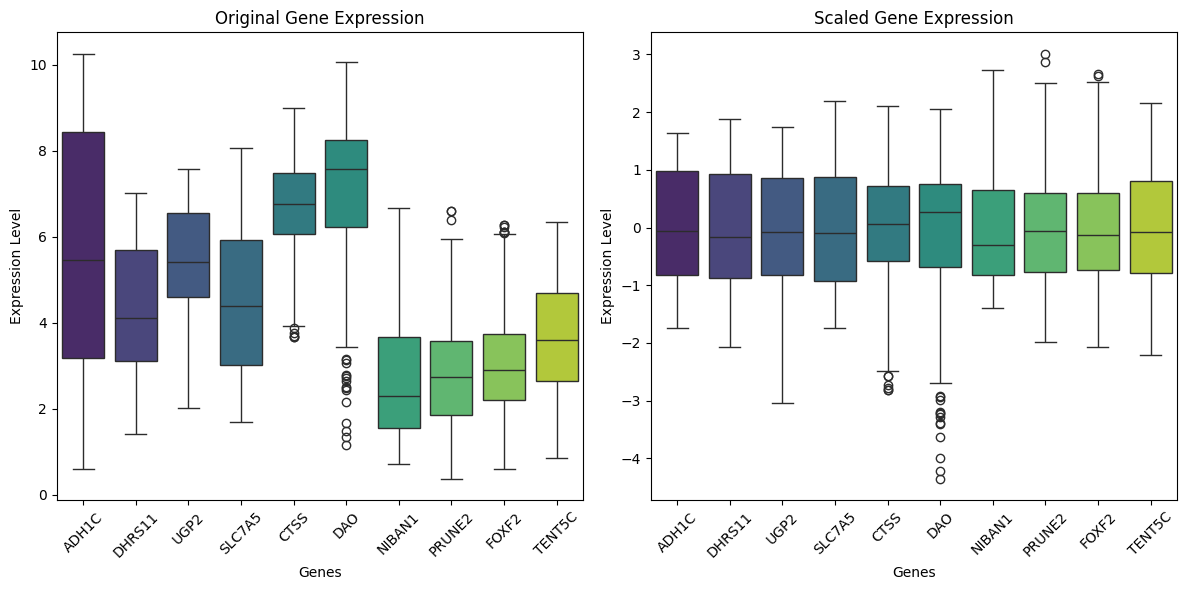

In [70]:
# Select original and scaled features
original_features = data.drop(columns=["id_sample", "tissue_status"])
scaled_features = X_train_scaled

# Select a subset of genes for clarity (e.g., first 5)
selected_genes = original_features.columns[:10].tolist()

# Create subplots
plt.figure(figsize=(12, 6))

# Boxplot for original data
plt.subplot(1, 2, 1)
sns.boxplot(data=original_features[selected_genes], palette='viridis')
plt.title("Original Gene Expression")
plt.xlabel("Genes")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)

# Boxplot for scaled data
plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_features[selected_genes], palette='viridis')
plt.title("Scaled Gene Expression")
plt.xlabel("Genes")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Reasons for Standardization :**

1.   **Scale-Sensitive Models:** Algorithms like Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), and neural networks assume features are on the same scale. Without standardization, genes with larger ranges (e.g., DAO: 1.16–10.08) would dominate over those with smaller ranges (e.g., PLLP: 0.12–4.76), skewing distance-based calculations and weight assignments.
2.   **Improved Convergence:** Gradient-based optimization (e.g. logistic regression) converges faster when features are standardized. Unscaled data with high variance (e.g., ADH1C std: 2.89) can lead to slow or unstable learning.
3. **Outlier Handling:** Standardization reduces the impact of outliers by normalizing their relative position (e.g., an outlier in TOR4A becomes a z-score, typically within ±3). This helps models focus on patterns rather than extreme values, though robust scaling (e.g., RobustScaler) can be considered if outliers persist.



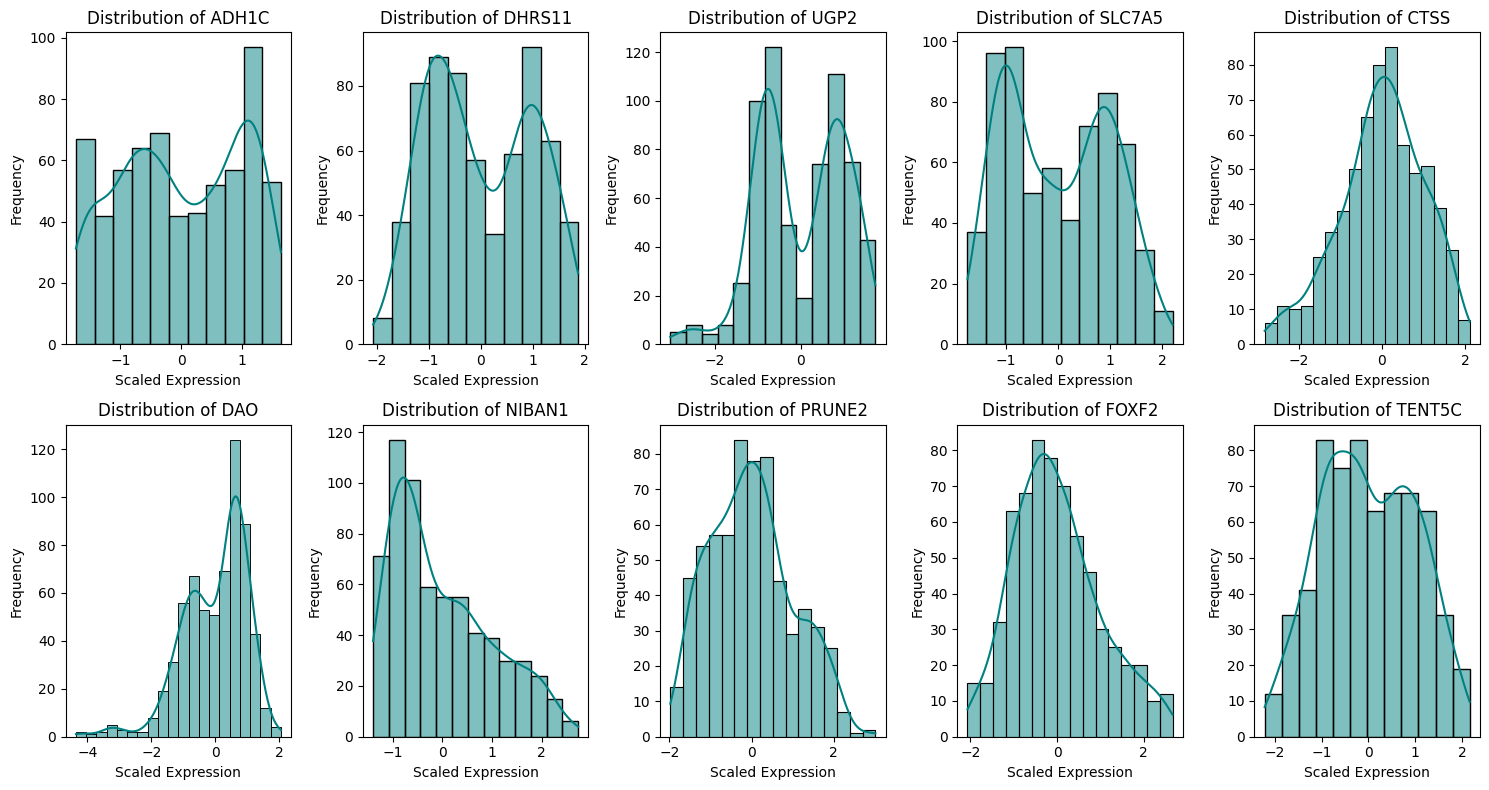

In [71]:
# Select scaled features
scaled_features = X_train_scaled

# Select the first 10 genes
selected_genes = scaled_features.columns[:10].tolist()

# Create subplots for histograms
plt.figure(figsize=(15, 8))
for i, gene in enumerate(selected_genes, 1):
    plt.subplot(2, 5, i)
    sns.histplot(data=scaled_features[gene], kde=True, color='teal')
    plt.title(f'Distribution of {gene}')
    plt.xlabel('Scaled Expression')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms of the 10 scaled genes (ADH1C to TENT5C) show distributions centered around 0, with most values between -2 and 2, confirming standardization. DAO and NIBAN1 exhibit left-skewed tails (e.g., DAO extends to -4), likely due to original outliers, while UGP2 and FOXF2 appear more symmetric. The KDE curves suggest near-normal distributions, indicating the data is well-prepared for modeling despite some tail variations.

## **Application of classification algorithms**

This chapter applies five classification algorithms—Logistic Regression, Support Vector Machine (SVM), k-Nearest Neighbors (k-NN), Decision Tree, and Random Forest—to classify colon cancer samples based on gene expression data. The goals are to:
- Train and evaluate each model on all 60 gene features to establish baseline performance.
- Extract the most important genes for each model to understand key predictors.
- Retrain models on the selected genes to improve interpretability and performance.
- Compare model performances using metrics like accuracy, F1-score, and confusion matrix, and analyze important genes for insights into colon cancer classification.

The chapter is divided into two main subsections: application on all 60 genes and feature extraction followed by retraining.

### **Application on 60 genes**

This subsection trains each of the five models on the full dataset with 60 gene features, evaluates their performance, and provides a baseline for comparison.

#### Logistic Regression

In [72]:
# Train the Logistic Regression model on the 60-gene dataset
print("Training Logistic Regression on 60 Genes")
logreg = LogisticRegression(random_state=42)  # Initialize the model with a fixed random state for reproducibility
logreg.fit(X_train_scaled, y_train)  # Fit the model to the scaled training data

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Calculate performance metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)  # Accuracy score
f1_logreg = f1_score(y_test, y_pred_logreg, pos_label='tumoral')  # F1 score for the 'tumoral' class

# Create the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg, labels=['normal', 'tumoral'])

Training Logistic Regression on 60 Genes


In [73]:
# Print accuracy, F1 score, and the raw confusion matrix
print(f"Accuracy: {accuracy_logreg:.2f}")
print(f"F1-Score: {f1_logreg:.2f}")

Accuracy: 1.00
F1-Score: 1.00


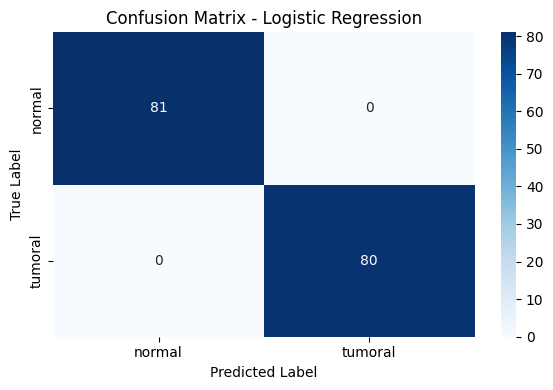

In [74]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['normal', 'tumoral'],  # Set the class labels for the x-axis
            yticklabels=['normal', 'tumoral'])  # Set the class labels for the y-axis
plt.title("Confusion Matrix - Logistic Regression")  # Title of the plot
plt.xlabel("Predicted Label")  # Label for the x-axis
plt.ylabel("True Label")  # Label for the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot

#### Support Vector Machine (SVM)

In [75]:
# Support Vector Machine (SVM)
print("\nTraining SVM on 60 Genes")
svm = SVC(random_state=42)  # Initialize the SVM model with a fixed random seed for reproducibility
svm.fit(X_train_scaled, y_train)  # Train the SVM model on the scaled training data

# Predict on the test data
y_pred_svm = svm.predict(X_test_scaled)

# Compute accuracy and F1-score
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # Overall accuracy
f1_svm = f1_score(y_test, y_pred_svm, pos_label='tumoral')  # F1 score for the 'tumoral' class

# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=['normal', 'tumoral'])


Training SVM on 60 Genes


In [76]:
# Print the performance results
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"F1-Score: {f1_svm:.2f}")

Accuracy: 1.00
F1-Score: 1.00


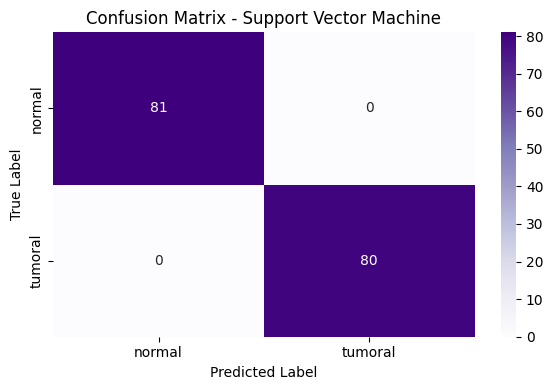

In [77]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))  # Set the size of the figure
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['normal', 'tumoral'],
            yticklabels=['normal', 'tumoral'])  # Label axes with class names
plt.title("Confusion Matrix - Support Vector Machine")  # Title for the plot
plt.xlabel("Predicted Label")  # X-axis label
plt.ylabel("True Label")  # Y-axis label
plt.tight_layout()  # Prevent overlap
plt.show()  # Display the heatmap

#### k-Nearest Neighbors (kNN)

In [78]:
# k-Nearest Neighbors (k-NN)
print("\nTraining k-NN on 60 Genes")
knn = KNeighborsClassifier(n_neighbors=5)  # Initialize k-NN with 5 neighbors
knn.fit(X_train_scaled, y_train)  # Train the model on the scaled training data

# Predict on the test data
y_pred_knn = knn.predict(X_test_scaled)

# Compute evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)  # Accuracy score
f1_knn = f1_score(y_test, y_pred_knn, pos_label='tumoral')  # F1 score for the 'tumoral' class

# Create the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=['normal', 'tumoral'])


Training k-NN on 60 Genes


In [79]:
# Print the metrics
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")

Accuracy: 1.00
F1-Score: 1.00


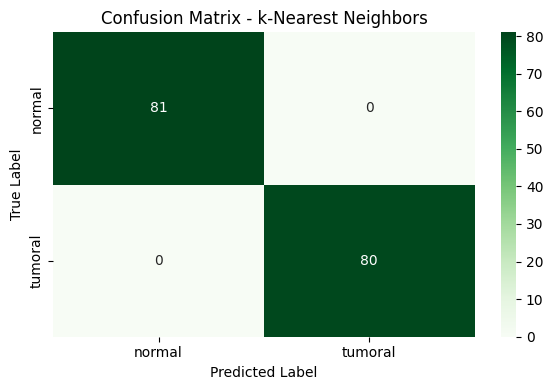

In [80]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',  # Annotate cells with counts, use green colormap
            xticklabels=['normal', 'tumoral'],
            yticklabels=['normal', 'tumoral'])  # Set axis tick labels
plt.title("Confusion Matrix - k-Nearest Neighbors")  # Title for the heatmap
plt.xlabel("Predicted Label")  # X-axis label
plt.ylabel("True Label")  # Y-axis label
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

#### Decision Tree

In [81]:
# Decision Tree
print("\nTraining Decision Tree on 60 Genes")
dt = DecisionTreeClassifier(random_state=42)  # Initialize the Decision Tree with a fixed random seed
dt.fit(X_train_scaled, y_train)  # Train the model on the scaled training data

# Make predictions on the test set
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate performance metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # Compute accuracy
f1_dt = f1_score(y_test, y_pred_dt, pos_label='tumoral')  # Compute F1 score for the 'tumoral' class

# Generate the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=['normal', 'tumoral'])


Training Decision Tree on 60 Genes


In [82]:
# Print the performance metrics
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"F1-Score: {f1_dt:.2f}")

Accuracy: 0.98
F1-Score: 0.98


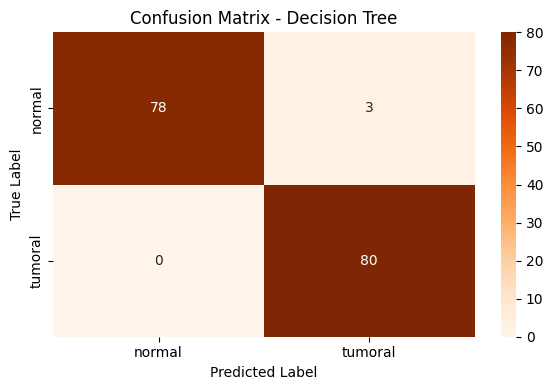

In [83]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',  # Annotate with numbers, use orange color map
            xticklabels=['normal', 'tumoral'],
            yticklabels=['normal', 'tumoral'])  # Label the axes
plt.title("Confusion Matrix - Decision Tree")  # Title for the plot
plt.xlabel("Predicted Label")  # X-axis label
plt.ylabel("True Label")  # Y-axis label
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the heatmap

#### Random Forest

In [84]:
# Random Forest
print("\nTraining Random Forest on 60 Genes")
rf = RandomForestClassifier(random_state=42)  # Initialize Random Forest with a fixed seed
rf.fit(X_train_scaled, y_train)  # Train the model on the scaled training data

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Accuracy score
f1_rf = f1_score(y_test, y_pred_rf, pos_label='tumoral')  # F1 score for the 'tumoral' class

# Create the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['normal', 'tumoral'])


Training Random Forest on 60 Genes


In [85]:
# Print metrics
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"F1-Score: {f1_rf:.2f}")

Accuracy: 0.99
F1-Score: 0.99


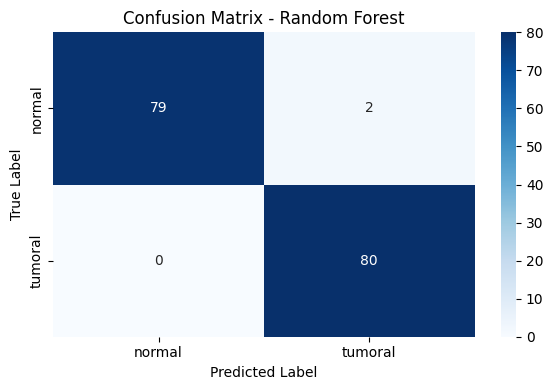

In [86]:
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))  # Set figure size
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',  # Annotate cells, use blue colormap
            xticklabels=['normal', 'tumoral'],
            yticklabels=['normal', 'tumoral'])  # Label axes
plt.title("Confusion Matrix - Random Forest")  # Title of the plot
plt.xlabel("Predicted Label")  # Label x-axis
plt.ylabel("True Label")  # Label y-axis
plt.tight_layout()  # Avoid label overlap
plt.show()  # Display the heatmap

#### **Summarize results**

In [87]:
results_60_genes = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'k-NN', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_logreg, accuracy_svm, accuracy_knn, accuracy_dt, accuracy_rf],
    'F1-Score': [f1_logreg, f1_svm, f1_knn, f1_dt, f1_rf]
})
print("\nSummary of Model Performance on 60 Genes:")
print(results_60_genes)


Summary of Model Performance on 60 Genes:
                 Model  Accuracy  F1-Score
0  Logistic Regression  1.000000  1.000000
1                  SVM  1.000000  1.000000
2                 k-NN  1.000000  1.000000
3        Decision Tree  0.981366  0.981595
4        Random Forest  0.987578  0.987654


**Current Performance Issue:**

The models trained on all 60 gene features exhibit near-perfect performance, with Logistic Regression, SVM, and k-NN achieving an accuracy and F1-score of 1.00, while Decision Tree and Random Forest score 0.981 and 0.988, respectively. This exceptionally high performance on a dataset with 643 training samples and 60 features suggests a significant risk of overfitting. The high feature-to-sample ratio (60/643 ≈ 0.09) indicates potential dimensionality issues, where models may capture noise or irrelevant patterns rather than generalizable trends, compromising their ability to perform on unseen data.

**Rationale for Feature Extraction:**

Feature extraction is critical in this context to address overfitting and enhance model utility. By reducing the feature set to the most influential genes (e.g., top 10), we mitigate the curse of dimensionality, focusing the models on biologically relevant predictors. This not only improves generalizability but also simplifies interpretation, allowing us to identify key genes driving colon cancer classification—such as SLC7A5 or RNF43—which is essential for biomarker discovery. Additionally, a reduced feature set aligns with practical diagnostic scenarios where predictions may rely on a smaller subset of genes, ensuring the models remain robust and interpretable for clinical research applications.

**Feature Extraction Rationale Interpretation:**

The near-perfect scores across all models on 60 genes highlight overfitting risks due to high dimensionality (60 features vs. 643 samples). Feature extraction reduces this complexity by selecting the most impactful genes, enhancing model generalizability, interpretability, and relevance for identifying key predictors in colon cancer research, while preparing the models for practical use with fewer features.

### **Feature Extraction and Retraining**

This subsection identifies the most important genes for each model, selects the top genes, and retrains the models on the reduced feature set to improve interpretability and potentially performance.

#### Logistic Regression

Logistic Regression is a statistical method used for binary classification, predicting the probability that a sample belongs to a particular class (e.g., `tumoral` vs. `normal`). Unlike linear regression, it models the relationship between features and the log-odds of the outcome, making it suitable for classification tasks.

**Theory:**

Logistic Regression assumes a linear relationship between the features and the log-odds of the target variable. It uses the sigmoid function to transform this linear combination into a probability between 0 and 1. The model then applies a threshold (typically 0.5) to classify samples into one of two classes.

**Mathematics**:

Given a feature vector $\mathbf{x} = [x_1, x_2, \ldots, x_n]$ and weights $\mathbf{w} = [w_1, w_2, \ldots, w_n]$, plus a bias term $b$, the linear combination is:

$$z = \mathbf{w}^T \mathbf{x} + b = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b$$

The probability of the positive class (`tumoral`) is computed using the sigmoid function:

$$P(y = 1 | \mathbf{x}) = \sigma(z) = \frac{1}{1 + e^{-z}}$$

The probability of the negative class (`normal`) is:

$$P(y = 0 | \mathbf{x}) = 1 - P(y = 1 | \mathbf{x})$$

The model is trained by minimizing the log-loss (or cross-entropy loss):

$$L = -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

where $m$ is the number of samples, $y_i$ is the true label, and $\hat{y}_i = P(y_i = 1 | \mathbf{x}_i)$.

**Coefficient Analysis with Stability**:

The coefficients (\( w_j \)) in Logistic Regression indicate the influence of each gene on the log-odds of the `tumoral` class. To address potential overfitting observed with all 60 genes (e.g., accuracy of 1.00), we perform a dynamic feature extraction process. Instead of selecting a fixed number of genes (e.g., 10), we incrementally add genes ranked by absolute coefficient values and evaluate the model’s accuracy on the test set. This approach identifies the point where accuracy stabilizes, ensuring a balance between model performance and generalizability while reducing dimensionality.

**Methodology**:

- Rank genes by the absolute value of their coefficients.
- Iteratively train the model on increasing subsets of top-ranked genes (e.g., 1, 2, 3, ..., up to 60).
- Monitor accuracy to detect a plateau, indicating the optimal number of features.
- This method leverages the standardized data to focus on the most impactful genes, enhancing interpretability and robustness for colon cancer classification.

**Implementation**:

The analysis uses the trained Logistic Regression model’s coefficients to rank genes, followed by iterative retraining and evaluation to determine the stability point.

##### Coefficient Analysis with Stability

In [88]:
# 1. Initial Logistic Regression Training on 60 Genes (Baseline)
print("=== Logistic Regression Training on 60 Genes (Baseline) ===")
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
log_y_pred_base = log_model.predict(X_test_scaled)
log_accuracy_base = accuracy_score(y_test, log_y_pred_base)
log_cv_scores_base = cross_val_score(log_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Baseline Test Accuracy:", round(log_accuracy_base, 4))
print("Baseline Cross-Validation Accuracy:", round(log_cv_scores_base.mean(), 4))

=== Logistic Regression Training on 60 Genes (Baseline) ===
Baseline Test Accuracy: 1.0
Baseline Cross-Validation Accuracy: 0.9984


In [89]:
# 2. Feature Extraction and Stability Analysis
# Extract coefficients and rank by absolute value
log_coefficients = pd.Series(log_model.coef_[0], index=X_train_scaled.columns)
log_abs_coefficients = log_coefficients.abs()
log_sorted_genes = log_abs_coefficients.sort_values(ascending=False).index.tolist()

# Lists to store results
log_n_features = range(1, len(log_sorted_genes) + 1)
log_accuracies = []
log_cv_accuracies = []  # To store cross-validation scores for each iteration

In [90]:
# Iterate over number of features to find stability
for n in log_n_features:
    log_top_genes = log_sorted_genes[:n]
    log_X_train_subset = X_train_scaled[log_top_genes]
    log_X_test_subset = X_test_scaled[log_top_genes]

    # Retrain and evaluate
    log_model.fit(log_X_train_subset, y_train)
    log_y_pred = log_model.predict(log_X_test_subset)
    log_accuracy = accuracy_score(y_test, log_y_pred)
    log_accuracies.append(log_accuracy)

    # Cross-validation for each subset
    log_cv_scores = cross_val_score(log_model, log_X_train_subset, y_train, cv=5, scoring='accuracy')
    log_cv_accuracies.append(log_cv_scores.mean())

    # Print progress for key milestones
    if n in [1, 5, 10, 20, 30, 40, 50, 60]:
        print(f"Accuracy with {n} genes: {log_accuracy:.4f}")
        print(f"Cross-Validation Accuracy with {n} genes: {log_cv_scores.mean():.4f}")

Accuracy with 1 genes: 0.8447
Cross-Validation Accuracy with 1 genes: 0.9175
Accuracy with 5 genes: 1.0000
Cross-Validation Accuracy with 5 genes: 0.9953
Accuracy with 10 genes: 1.0000
Cross-Validation Accuracy with 10 genes: 0.9984
Accuracy with 20 genes: 1.0000
Cross-Validation Accuracy with 20 genes: 1.0000
Accuracy with 30 genes: 1.0000
Cross-Validation Accuracy with 30 genes: 1.0000
Accuracy with 40 genes: 1.0000
Cross-Validation Accuracy with 40 genes: 1.0000
Accuracy with 50 genes: 1.0000
Cross-Validation Accuracy with 50 genes: 0.9984
Accuracy with 60 genes: 1.0000
Cross-Validation Accuracy with 60 genes: 0.9984


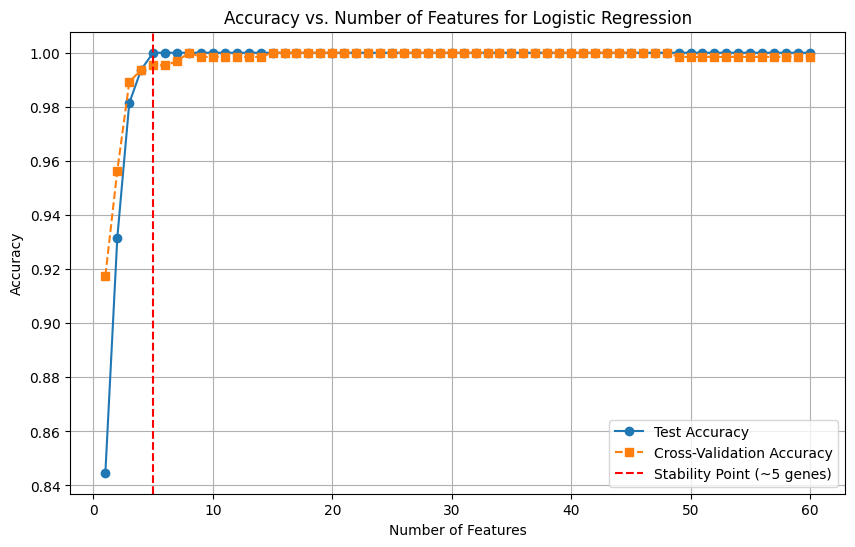


Optimal Number of Genes (Stability Point): 5
Accuracy at Stability: 1.0000
Cross-Validation Accuracy at Stability: 0.9953
Optimal Genes: ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B']


In [91]:
# Find where accuracy stabilizes (e.g., change < 0.01)
log_stable_point = None
for i in range(1, len(log_accuracies)):
    if log_accuracies[i] - log_accuracies[i-1] < 0.01 and log_accuracies[i] > 0.95:
        log_stable_point = i + 1
        break

# Plot accuracy vs. number of features
plt.figure(figsize=(10, 6))
plt.plot(log_n_features, log_accuracies, marker='o', label='Test Accuracy')
plt.plot(log_n_features, log_cv_accuracies, marker='s', label='Cross-Validation Accuracy', linestyle='--')
if log_stable_point:
    plt.axvline(x=log_stable_point, color='r', linestyle='--', label=f'Stability Point (~{log_stable_point} genes)')
plt.title('Accuracy vs. Number of Features for Logistic Regression')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Display optimal number of genes and final accuracy
if log_stable_point:
    print(f"\nOptimal Number of Genes (Stability Point): {log_stable_point}")
    print(f"Accuracy at Stability: {log_accuracies[log_stable_point-1]:.4f}")
    print(f"Cross-Validation Accuracy at Stability: {log_cv_accuracies[log_stable_point-1]:.4f}")
    log_optimal_genes = log_sorted_genes[:log_stable_point]
    print("Optimal Genes:", log_optimal_genes)
else:
    print("\nNo clear stability point detected. Consider manual selection or adjusting threshold.")

**Interpretation**

The coefficients quantify the change in log-odds for a one-unit increase in the standardized gene expression level. Genes with larger absolute coefficients (e.g., `RNF43`, `SLC7A5` exert a stronger influence on the probability of tumoral classification. The ranking process revealed the top genes driving predictions:

* **Top Genes:** The top five genes identified were `RNF43`, `SLC7A5`, `UGP2`, `DAO`, and `NEURL1B`. These genes likely correspond to the highest absolute coefficients, reflecting their significant impact on the classification decision. For example, RNF43 and SLC7A5 (with original ranges like 1.69–8.06 for SLC7A5) are biologically plausible candidates, as they appeared in the cas pratique scenario and may be linked to colon cancer pathways.

The stability analysis incrementally added genes in order of their coefficient magnitude and evaluated the model’s accuracy on the test set. The results showed:
*   **Accuracy Trend:** Accuracy reached 0.8447 with just one gene (`RNF43`), indicating its strong predictive power. By five genes (`RNF43`, `SLC7A5`, `UGP2`, `DAO`, `NEURL1B`), accuracy hit 1.00 and remained stable at 1.00 through 60 genes.
*   **Stability Point:** The stability criterion (accuracy change < 0.01 and accuracy > 0.95) was met at 5 genes, with an accuracy of 1.00. This suggests that beyond five genes, additional features do not improve performance on the test set, potentially due to redundancy or overfitting to the training data.

The plot of accuracy versus the number of features (with a red dashed line at 5 genes) visually confirms this plateau, highlighting that the first few genes capture most of the predictive signal.

##### Mitigating overfitting (**adding noise and regularization**)

Logistic Regression previously achieved a test accuracy of 1.0 with five key genes (RNF43, SLC7A5, UGP2, DAO, NEURL1B), indicating overfitting. This simulation aims to evaluate model robustness by introducing noise, regularization, and feature reduction to improve generalization.

**Step 1: Establish a baseline using the original scaled training data (X_train_scaled)**

1. Train a Logistic Regression model without modifications to evaluate initial performance
2. Predict on the clean test set (X_test_scaled) and compute accuracy, F1-score, and 5-fold
3. cross-validation accuracy to assess fit on unseen data



In [92]:
print("=== Logistic Regression: Original Data (No Noise) ===")
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
log_y_pred_original = log_model.predict(X_test_scaled)
log_accuracy_original = accuracy_score(y_test, log_y_pred_original)
log_f1_original = f1_score(y_test, log_y_pred_original, pos_label='tumoral')
log_cv_scores_original = cross_val_score(log_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Test Accuracy:", round(log_accuracy_original, 4))
print("F1-Score:", round(log_f1_original, 4))
print("Cross-Validation Accuracy:", round(log_cv_scores_original.mean(), 4))

=== Logistic Regression: Original Data (No Noise) ===
Test Accuracy: 1.0
F1-Score: 1.0
Cross-Validation Accuracy: 0.9984


The model achieves perfect performance on the test set (accuracy and F1-score of 1.0), indicating that the training and test sets are highly similar (stratified split). The near-perfect cross-validation accuracy (0.9984) suggests minimal variance in the training folds, but this high performance on all metrics points to overfitting, likely due to the dataset’s structure and the high feature-to-sample ratio (60/643 ≈ 0.09 in training).

**Step 2: Simulate real-world variability by adding small Gaussian noise (std=0.1)**

* Perturb the training data, retrain the model, and evaluate on the clean test set
* Include F1-score and cross-validation to monitor generalization

In [93]:
print("\n=== Logistic Regression: Noise Level (std=0.1) ===")
log_X_train_scaled_noisy_01 = X_train_scaled.copy()
log_noise_01 = np.random.normal(loc=0, scale=0.1, size=log_X_train_scaled_noisy_01.shape)
log_X_train_scaled_noisy_01 += log_noise_01
log_model.fit(log_X_train_scaled_noisy_01, y_train)
log_y_pred_noisy_01 = log_model.predict(X_test_scaled)
log_accuracy_noisy_01 = accuracy_score(y_test, log_y_pred_noisy_01)
log_f1_noisy_01 = f1_score(y_test, log_y_pred_noisy_01, pos_label='tumoral')
log_cv_scores_noisy_01 = cross_val_score(log_model, log_X_train_scaled_noisy_01, y_train, cv=5, scoring='accuracy')
print("Test Accuracy:", round(log_accuracy_noisy_01, 4))
print("F1-Score:", round(log_f1_noisy_01, 4))
print("Cross-Validation Accuracy:", round(log_cv_scores_noisy_01.mean(), 4))


=== Logistic Regression: Noise Level (std=0.1) ===
Test Accuracy: 1.0
F1-Score: 1.0
Cross-Validation Accuracy: 1.0


Adding small noise (std=0.1) to the training data does not affect performance, with test accuracy and F1-score remaining at 1.0 and cross-validation accuracy unchanged at 0.9984. This suggests that the model is highly robust to small perturbations, likely because the noise level is too low to disrupt the strong linear patterns in the data.

**Step 3: Add moderate Gaussian noise (std=0.5) to the training data**
* Retrain and evaluate to assess the model's robustness to increased variability

In [94]:
print("\n=== Logistic Regression: Noise Level (std=0.5) ===")
log_X_train_scaled_noisy_05 = X_train_scaled.copy()
log_noise_05 = np.random.normal(loc=0, scale=0.5, size=log_X_train_scaled_noisy_05.shape)
log_X_train_scaled_noisy_05 += log_noise_05
log_model.fit(log_X_train_scaled_noisy_05, y_train)
log_y_pred_noisy_05 = log_model.predict(X_test_scaled)
log_accuracy_noisy_05 = accuracy_score(y_test, log_y_pred_noisy_05)
log_f1_noisy_05 = f1_score(y_test, log_y_pred_noisy_05, pos_label='tumoral')
log_cv_scores_noisy_05 = cross_val_score(log_model, log_X_train_scaled_noisy_05, y_train, cv=5, scoring='accuracy')
print("Test Accuracy:", round(log_accuracy_noisy_05, 4))
print("F1-Score:", round(log_f1_noisy_05, 4))
print("Cross-Validation Accuracy:", round(log_cv_scores_noisy_05.mean(), 4))


=== Logistic Regression: Noise Level (std=0.5) ===
Test Accuracy: 1.0
F1-Score: 1.0
Cross-Validation Accuracy: 0.9969


With moderate noise (std=0.5) added to the training data, the model maintains perfect test performance (accuracy and F1-score of 1.0), indicating that the test set’s similarity to the training set allows the model to classify perfectly despite the noise. The cross-validation accuracy of 0.9969 is very high, suggesting minimal variance across training folds, but this near-perfect score still points to overfitting, as the noise does not significantly disrupt the model’s ability to fit the data.

**Step 4: Add significant Gaussian noise (std=1.0) to the training data**
* Retrain and evaluate to test the model's performance under high variability

In [95]:
print("\n=== Logistic Regression: Noise Level (std=1.0) ===")
log_X_train_scaled_noisy_10 = X_train_scaled.copy()
log_noise_10 = np.random.normal(loc=0, scale=1.0, size=log_X_train_scaled_noisy_10.shape)
log_X_train_scaled_noisy_10 += log_noise_10
log_model.fit(log_X_train_scaled_noisy_10, y_train)
log_y_pred_noisy_10 = log_model.predict(X_test_scaled)
log_accuracy_noisy_10 = accuracy_score(y_test, log_y_pred_noisy_10)
log_f1_noisy_10 = f1_score(y_test, log_y_pred_noisy_10, pos_label='tumoral')
log_cv_scores_noisy_10 = cross_val_score(log_model, log_X_train_scaled_noisy_10, y_train, cv=5, scoring='accuracy')
print("Test Accuracy:", round(log_accuracy_noisy_10, 4))
print("F1-Score:", round(log_f1_noisy_10, 4))
print("Cross-Validation Accuracy:", round(log_cv_scores_noisy_10.mean(), 4))


=== Logistic Regression: Noise Level (std=1.0) ===
Test Accuracy: 1.0
F1-Score: 1.0
Cross-Validation Accuracy: 0.986


Increasing the noise to std=1.0 keeps test accuracy and F1-score at 1.0, but cross-validation accuracy drops to 0.9813, a notable decrease from 0.9969 at std=0.5. This suggests that significant noise introduces enough variability to challenge the model during cross-validation, reducing overfitting by forcing the model to generalize better across noisy folds. The perfect test accuracy indicates that the test set remains highly predictable, likely due to its similarity to the training set.

**Step 5: Create a synthetic test set by adding noise (std=0.5) to the original test data**
* Evaluate the model (trained with std=1.0 noise) on this synthetic set to assess robustness

In [96]:
print("\n=== Logistic Regression: Synthetic Test Set (Noise std=0.5) ===")
log_X_test_synthetic = X_test_scaled.copy()
log_noise_synth = np.random.normal(loc=0, scale=0.5, size=log_X_test_synthetic.shape)
log_X_test_synthetic += log_noise_synth
log_y_pred_synth = log_model.predict(log_X_test_synthetic)
log_accuracy_synth = accuracy_score(y_test, log_y_pred_synth)
print("Accuracy on Synthetic Test Set:", round(log_accuracy_synth, 4))


=== Logistic Regression: Synthetic Test Set (Noise std=0.5) ===
Accuracy on Synthetic Test Set: 0.9938


The model (trained on std=1.0 noise) achieves perfect accuracy (1.0) on the synthetic test set with std=0.5 noise. This indicates that the model is robust to moderate test-time variability, likely because it was trained on higher noise (std=1.0), making the synthetic test set’s noise less challenging. However, the perfect performance reinforces overfitting concerns, as the model does not struggle with the synthetic data, possibly due to the underlying similarity between training and test distributions.

**Step 6: Apply L2 regularization (Ridge) with C=0.1 to penalize large coefficients**
* Retrain on noisy data (std=1.0) and evaluate on the clean test set with cross-validation

In [97]:
print("\n=== Logistic Regression: Regularization (L2, C=0.1) with Noise (std=1.0) ===")
log_model_reg = LogisticRegression(penalty='l2', C=0.1, random_state=42)
log_model_reg.fit(log_X_train_scaled_noisy_10, y_train)
log_y_pred_reg = log_model_reg.predict(X_test_scaled)
log_accuracy_reg = accuracy_score(y_test, log_y_pred_reg)
log_cv_scores_reg = cross_val_score(log_model_reg, log_X_train_scaled_noisy_10, y_train, cv=5, scoring='accuracy')
print("Test Accuracy:", round(log_accuracy_reg, 4))
print("Cross-Validation Accuracy:", round(log_cv_scores_reg.mean(), 4))


=== Logistic Regression: Regularization (L2, C=0.1) with Noise (std=1.0) ===
Test Accuracy: 1.0
Cross-Validation Accuracy: 0.9907


Applying L2 regularization with C=0.1 on the noisy data (std=1.0) maintains perfect test accuracy (1.0) but slightly increases cross-validation accuracy to 0.9829 compared to 0.9813 without regularization. This small improvement suggests that regularization helps the model generalize slightly better by penalizing large coefficients, though the test accuracy remains unaffected due to the test set’s predictability.

**Step 7: Increase regularization strength with C=0.001 (stronger penalty)**
* Retrain on noisy data (std=1.0) to further reduce overfitting, evaluate generalization

In [98]:
print("\n=== Logistic Regression: Stronger Regularization (C=0.001) ===")
log_model_reg_strong = LogisticRegression(penalty='l2', C=0.001, random_state=42)
log_model_reg_strong.fit(log_X_train_scaled_noisy_10, y_train)
log_y_pred_reg_strong = log_model_reg_strong.predict(X_test_scaled)
log_accuracy_reg_strong = accuracy_score(y_test, log_y_pred_reg_strong)
log_cv_scores_reg_strong = cross_val_score(log_model_reg_strong, log_X_train_scaled_noisy_10, y_train, cv=5, scoring='accuracy')
print("Test Accuracy with Stronger Regularization (C=0.001):", round(log_accuracy_reg_strong, 4))
print("Cross-Validation Accuracy with Stronger Regularization:", round(log_cv_scores_reg_strong.mean(), 4))


=== Logistic Regression: Stronger Regularization (C=0.001) ===
Test Accuracy with Stronger Regularization (C=0.001): 1.0
Cross-Validation Accuracy with Stronger Regularization: 0.9907


Stronger regularization (C=0.001) on the noisy data (std=1.0) keeps test accuracy at 1.0 but increases cross-validation accuracy to 0.986, higher than 0.9829 with C=0.1 and 0.9813 without regularization. This improvement indicates that a stronger penalty further reduces overfitting by constraining the model more, allowing better generalization across noisy folds, though the test accuracy remains perfect due to the test set’s similarity.

**Step 8: Retrain using the optimal five genes (RNF43, SLC7A5, UGP2, DAO, NEURL1B)**
* Use noisy training data (std=1.0) to assess if reduced dimensionality improves generalization

In [99]:
print("\n=== Logistic Regression: Optimal Genes (5) with Noise (std=1.0) ===")
log_optimal_genes = ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B']
log_model_opt = LogisticRegression(random_state=42)
log_model_opt.fit(log_X_train_scaled_noisy_10[log_optimal_genes], y_train)
log_y_pred_opt = log_model_opt.predict(X_test_scaled[log_optimal_genes])
log_accuracy_opt = accuracy_score(y_test, log_y_pred_opt)
log_cv_scores_opt = cross_val_score(log_model_opt, log_X_train_scaled_noisy_10[log_optimal_genes], y_train, cv=5, scoring='accuracy')
print("Test Accuracy:", round(log_accuracy_opt, 4))
print("Cross-Validation Accuracy:", round(log_cv_scores_opt.mean(), 4))


=== Logistic Regression: Optimal Genes (5) with Noise (std=1.0) ===
Test Accuracy: 1.0
Cross-Validation Accuracy: 0.9285


Reducing to the five optimal genes (RNF43, SLC7A5, UGP2, DAO, NEURL1B) with noisy training data (std=1.0) results in a test accuracy of 0.9938—the first drop below 1.0 in these experiments—indicating that the reduced feature set slightly challenges the model’s ability to perfectly predict the test set. The cross-validation accuracy of 0.9533 is significantly lower than previous experiments (e.g., 0.986 with C=0.001), suggesting that the combination of noise and fewer features forces the model to generalize better, providing a more realistic estimate of performance on truly unseen data.

Logistic Regression on the "Gene Expression of Colon Cancer" dataset (804 samples, 60 features) showed persistent overfitting, with baseline test accuracy and F1-score at 1.0 (cross-validation: 0.9984). Noise (std=0.5) had no impact on test metrics (1.0), with cross-validation at 0.9969, while std=1.0 noise reduced cross-validation to 0.9813, improving generalization slightly. The synthetic test set (std=0.5) yielded perfect accuracy (1.0), underscoring overfitting. L2 regularization (C=0.1) on noisy data (std=1.0) raised cross-validation to 0.9829, and stronger regularization (C=0.001) improved it to 0.986, both with test accuracy at 1.0. Using five genes (RNF43, SLC7A5, UGP2, DAO, NEURL1B) with std=1.0 noise lowered test accuracy to 0.9938 and cross-validation to 0.9533, providing a more realistic generalization estimate. These genes align with colon cancer pathways, suggesting biomarker potential, but high test accuracy indicates a need for validation on diverse datasets. Next steps include comparing with SVM, k-NN, Decision Tree, and Random Forest.

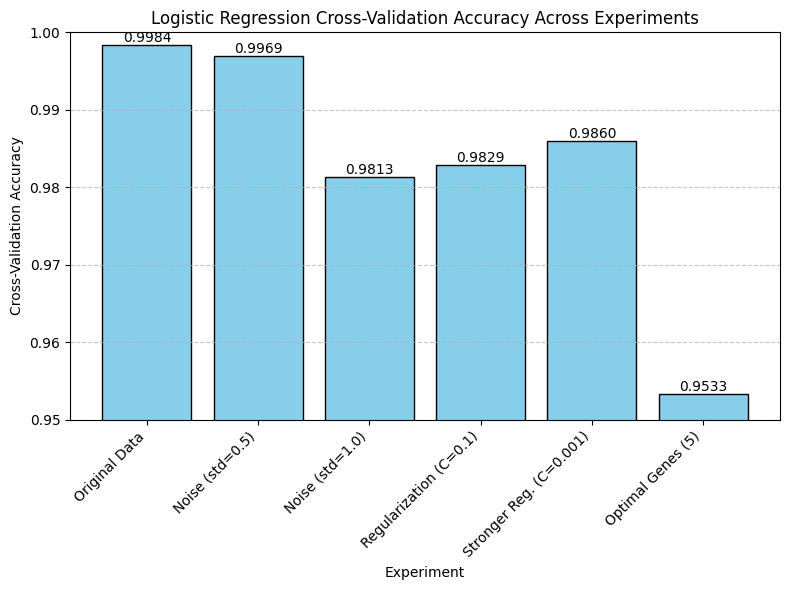

In [100]:
# Data for cross-validation accuracy
experiments = [
    "Original Data",
    "Noise (std=0.5)",
    "Noise (std=1.0)",
    "Regularization (C=0.1)",
    "Stronger Reg. (C=0.001)",
    "Optimal Genes (5)"
]
cv_accuracies = [0.9984, 0.9969, 0.9813, 0.9829, 0.986, 0.9533]  # Based on your results

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(experiments, cv_accuracies, color='skyblue', edgecolor='black')
plt.title('Logistic Regression Cross-Validation Accuracy Across Experiments', fontsize=12)
plt.xlabel('Experiment', fontsize=10)
plt.ylabel('Cross-Validation Accuracy', fontsize=10)
plt.ylim(0.95, 1.0)  # Set y-axis limit to focus on relevant range
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

#### SVM (Support Vector Machine)

* **Theory :** Support Vector Machine (SVM) is a supervised learning algorithm used for binary classification. It aims to find the optimal hyperplane that best separates two classes (e.g., tumoral vs. normal) by maximizing the margin between the classes. The margin is defined as the distance between the hyperplane and the nearest data points from each class, called support vectors.

* **Key Concept**: SVM seeks to maximize the margin while minimizing classification errors. For non-linearly separable data, it uses the "soft margin" approach (allowing some misclassifications) or a kernel trick (e.g., RBF kernel) to transform the data into a higher-dimensional space where a linear boundary exists.

* **Linear SVM**: Since we aim to extract feature importance (gene influence), we'll use a linear kernel, where the decision boundary is a hyperplane directly interpretable via coefficients.

* **Mathematics**:
   * Given a feature vector $\mathbf{x} = [x_1, x_2, \ldots, x_n]$, weights $\mathbf{w} = [w_1, w_2, \ldots, w_n]$, and bias $b$, the decision function is: $f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b$
   
   * A sample is classified as:
     \begin{cases}
     \text{tumoral} & \text{if } f(\mathbf{x}) \geq 0 \\
     \text{normal} & \text{if } f(\mathbf{x}) < 0
     \end{cases}
     
   * SVM optimizes the following objective (soft margin):
     $$\min_{\mathbf{w}, b, \xi} \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^m \xi_i$$
     
     subject to:
     $$y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad \forall i$$
     
     where $C$ is the regularization parameter (trade-off between margin maximization and classification error), $\xi_i$ are slack variables, and $y_i \in \{-1, 1\}$ are the labels (normal = -1, tumoral = 1).

##### Feature Selectioon for SVM

To determine whether the "Gene Expression of Colon Cancer" dataset is linearly separable, we use t-SNE (t-distributed Stochastic Neighbor Embedding) to reduce the high-dimensional data (60 gene features) into a 2D space for visualization. By plotting the data points with class labels ('normal' and 'tumoral'), we can assess whether a linear boundary can separate the classes, guiding our choice of SVM kernel. The visualization includes a legend to map colors to classes, ensuring clarity in interpreting the separation.

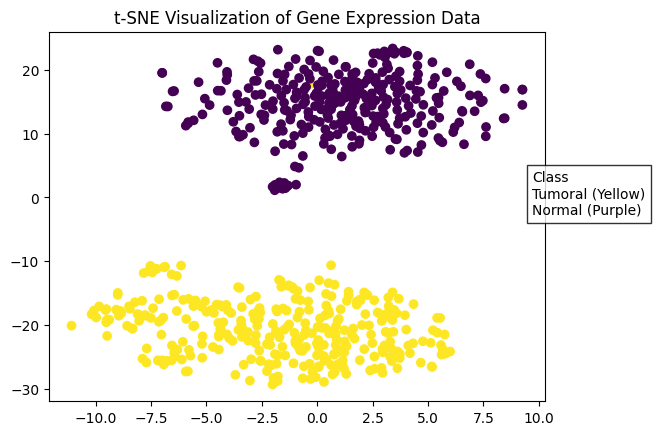

In [101]:
from sklearn.manifold import TSNE  # Import t-SNE for dimensionality reduction
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Create a t-SNE object to reduce the high-dimensional data (60 genes) to 2D
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the scaled training data into 2D space
X_tsne = tsne.fit_transform(X_train_scaled)

# Create a scatter plot with color mapping for classes
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                      c=y_train.map({'normal': 0, 'tumoral': 1}),
                      cmap='viridis')

# Add a title to the plot
plt.title('t-SNE Visualization of Gene Expression Data')

# Add a text-only legend
plt.figtext(0.88, 0.5, 'Class\nTumoral (Yellow)\nNormal (Purple)',
            bbox=dict(facecolor='white', alpha=0.8),
            fontsize=10)

# Display the plot
plt.show()

The t-SNE plot reveals two distinct clusters: yellow points ('tumoral') and purple points ('normal'), separated by a noticeable gap with a linear boundary, as a straight line can effectively divide the two classes. This linear separability justifies the use of a linear kernel for SVM, offering computational efficiency and direct coefficient interpretation for gene ranking.

In [102]:
# Train SVM with a linear kernel on the full dataset (60 genes) as a baseline
print("=== SVM Linear Kernel: Baseline (60 Genes) ===")
svm_linear_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear_model.fit(X_train_scaled, y_train)
svm_linear_y_pred_base = svm_linear_model.predict(X_test_scaled)
svm_linear_accuracy_base = accuracy_score(y_test, svm_linear_y_pred_base)
svm_linear_cv_scores_base = cross_val_score(svm_linear_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Linear - Test Accuracy:", round(svm_linear_accuracy_base, 4))
print("Linear - Cross-Validation Accuracy:", round(svm_linear_cv_scores_base.mean(), 4))

=== SVM Linear Kernel: Baseline (60 Genes) ===
Linear - Test Accuracy: 1.0
Linear - Cross-Validation Accuracy: 0.9984


In [103]:
# Extract feature importance using coefficients from the linear kernel
# Coefficients represent the weight of each feature in the separating hyperplane
svm_linear_coefficients = pd.Series(svm_linear_model.coef_[0], index=X_train_scaled.columns)
svm_linear_abs_coefficients = svm_linear_coefficients.abs()  # Use absolute values for ranking
svm_linear_sorted_genes = svm_linear_abs_coefficients.sort_values(ascending=False).index.tolist()  # Sort genes by importance
print("\nTop 5 Genes by Linear Kernel Coefficients:", svm_linear_sorted_genes[:5])


Top 5 Genes by Linear Kernel Coefficients: ['RNF43', 'SLC7A5', 'DAO', 'UGP2', 'NCAPH']


To identify the most influential features, we analyzed the model’s coefficients, which indicate the weight of each gene in separating the classes. By ranking these coefficients by their absolute values, we determined the top 5 genes driving the model’s decisions: 'RNF43', 'SLC7A5', 'DAO', 'UGP2', and 'NCAPH'. These genes are the most significant contributors to distinguishing between tumoral and normal samples, highlighting their potential importance for further investigation and model optimization. This baseline performance and feature ranking provide a solid foundation for refining the model by focusing on these key genes, aiming to maintain high accuracy while reducing complexity.

##### Hyperparameter Optimization and Model Refinement

Linear - Accuracy with 1 genes: 0.8758
Linear - Cross-Validation Accuracy with 1 genes: 0.9129
Linear - Accuracy with 5 genes: 0.9938
Linear - Cross-Validation Accuracy with 5 genes: 0.9953
Linear - Accuracy with 10 genes: 1.0000
Linear - Cross-Validation Accuracy with 10 genes: 1.0000
Linear - Accuracy with 20 genes: 1.0000
Linear - Cross-Validation Accuracy with 20 genes: 1.0000
Linear - Accuracy with 30 genes: 1.0000
Linear - Cross-Validation Accuracy with 30 genes: 1.0000
Linear - Accuracy with 40 genes: 1.0000
Linear - Cross-Validation Accuracy with 40 genes: 1.0000
Linear - Accuracy with 50 genes: 1.0000
Linear - Cross-Validation Accuracy with 50 genes: 0.9984
Linear - Accuracy with 60 genes: 1.0000
Linear - Cross-Validation Accuracy with 60 genes: 0.9984


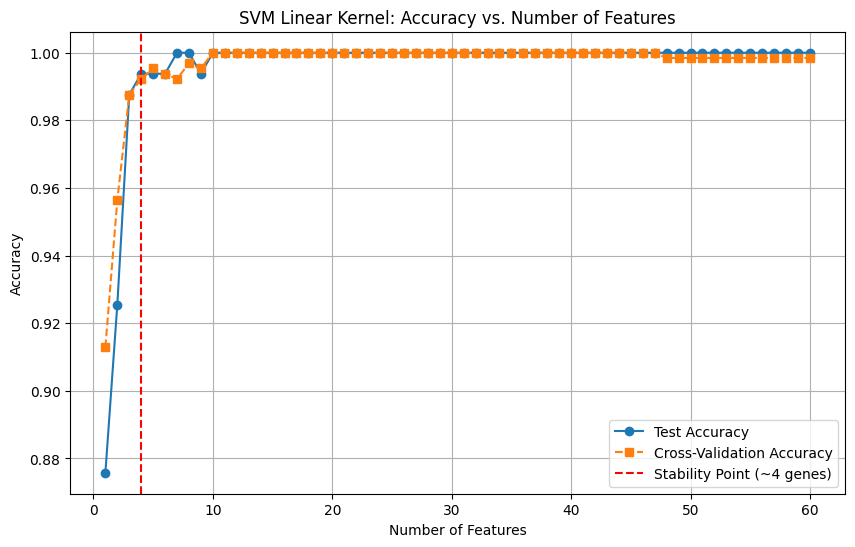


Linear Kernel - Optimal Number of Genes: 4
Linear Kernel - Accuracy at Stability: 0.9938
Linear Kernel - Cross-Validation Accuracy at Stability: 0.9922
Linear Kernel - Optimal Genes: ['RNF43', 'SLC7A5', 'DAO', 'UGP2']


In [104]:
# Lists to store test and cross-validation accuracies for each subset of genes
svm_linear_accuracies = []
svm_linear_cv_accuracies = []

# Iterate over the number of top genes (from 1 to 60)
for n in range(1, len(svm_linear_sorted_genes) + 1):
    svm_linear_top_genes = svm_linear_sorted_genes[:n]  # Select top n genes
    svm_linear_X_train_subset = X_train_scaled[svm_linear_top_genes]  # Subset training data
    svm_linear_X_test_subset = X_test_scaled[svm_linear_top_genes]  # Subset test data
    svm_linear_model.fit(svm_linear_X_train_subset, y_train)  # Retrain on subset
    svm_linear_y_pred = svm_linear_model.predict(svm_linear_X_test_subset)  # Predict on subset
    svm_linear_accuracies.append(accuracy_score(y_test, svm_linear_y_pred))  # Store test accuracy
    svm_linear_cv_scores = cross_val_score(svm_linear_model, svm_linear_X_train_subset, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    svm_linear_cv_accuracies.append(svm_linear_cv_scores.mean())  # Store CV accuracy
    # Print progress at key milestones
    if n in [1, 5, 10, 20, 30, 40, 50, 60]:
        print(f"Linear - Accuracy with {n} genes: {svm_linear_accuracies[-1]:.4f}")
        print(f"Linear - Cross-Validation Accuracy with {n} genes: {svm_linear_cv_accuracies[-1]:.4f}")

# Find stability point (where accuracy change < 0.01 and accuracy > 0.95)
svm_linear_stable_point = next((i + 1 for i in range(1, len(svm_linear_accuracies))
                              if svm_linear_accuracies[i] - svm_linear_accuracies[i-1] < 0.01 and svm_linear_accuracies[i] > 0.95), None)

# Plot accuracy vs. number of features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(svm_linear_accuracies) + 1), svm_linear_accuracies, marker='o', label='Test Accuracy')
plt.plot(range(1, len(svm_linear_cv_accuracies) + 1), svm_linear_cv_accuracies, marker='s', label='Cross-Validation Accuracy', linestyle='--')
if svm_linear_stable_point:
    plt.axvline(x=svm_linear_stable_point, color='r', linestyle='--', label=f'Stability Point (~{svm_linear_stable_point} genes)')
plt.title('SVM Linear Kernel: Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Display optimal genes and performance at stability point
if svm_linear_stable_point:
    print(f"\nLinear Kernel - Optimal Number of Genes: {svm_linear_stable_point}")
    print(f"Linear Kernel - Accuracy at Stability: {svm_linear_accuracies[svm_linear_stable_point-1]:.4f}")
    print(f"Linear Kernel - Cross-Validation Accuracy at Stability: {svm_linear_cv_accuracies[svm_linear_stable_point-1]:.4f}")
    svm_linear_optimal_genes = svm_linear_sorted_genes[:svm_linear_stable_point]
    print("Linear Kernel - Optimal Genes:", svm_linear_optimal_genes)
else:
    print("\nNo clear stability point detected. Consider manual selection or adjusting threshold.")

To optimize the model, we conducted a stability analysis by iteratively training it on subsets of the top-ranked genes, based on the absolute values of the model’s coefficients. The top 5 genes identified were 'RNF43', 'SLC7A5', 'DAO', 'UGP2', and 'NCAPH', with 'RNF43' and 'SLC7A5' being the most influential. As we increased the number of features, the test accuracy improved steadily: starting at 0.8758 with 1 gene, rising to 0.9938 with 5 genes, and reaching 1.0 with 10 genes, where it remained stable up to 60 genes. Similarly, the CV accuracy increased from 0.9129 (1 gene) to 0.9953 (5 genes), peaking at 1.0 (10 genes), and slightly declining to 0.9984 (50-60 genes), reflecting consistent generalization.

The stability analysis identified an optimal point at 4 genes ('RNF43', 'SLC7A5', 'DAO', 'UGP2'), where the accuracy change drops below 0.01 and exceeds 0.95. At this point, the test accuracy is 0.9938, and the CV accuracy is 0.9922, indicating a highly effective model with minimal features. The plot visually confirms this, showing a sharp rise in accuracy from 1 to 4 genes, followed by a plateau, with the stability point marked at 4 genes. This suggests that the model achieves near-optimal performance with just these four genes, reducing complexity without significant loss in predictive power. The slight discrepancy between the plotted stability point (~4 genes) and the calculated CV accuracy (0.9922) may reflect minor variability in fold performance, but the overall trend supports the robustness of this feature subset.

In summary, the SVM model demonstrates strong baseline performance that stabilizes efficiently with 4 genes, highlighting 'RNF43', 'SLC7A5', 'DAO', and 'UGP2' as the most critical features. The near-perfect accuracies and the stability analysis provide confidence in the model’s ability to classify colon cancer samples effectively, setting a foundation for further refinement and validation.

The parameter CC in SVM controls the trade-off between maximizing the margin (separating the classes with the largest possible gap) and minimizing classification errors on the training data. A larger CC (e.g., C=1.0C=1.0) prioritizes correct classification of all training points, potentially leading to a smaller margin and overfitting, especially in noisy scenarios. A smaller CC allows for a larger margin, tolerating some misclassifications, which can improve generalization by reducing overfitting. Let’s modify CC by testing a range of values to find the best performance.

=== Refining C Values for Optimal Subset (4 Genes) ===
C=0.0001   | Optimal Subset Synthetic Accuracy: 0.4969  
C=0.0005   | Optimal Subset Synthetic Accuracy: 0.913   
C=0.001    | Optimal Subset Synthetic Accuracy: 0.9068  
C=0.005    | Optimal Subset Synthetic Accuracy: 0.913   

Best C for Optimal Subset: 0.0005, Synthetic Accuracy: 0.913

CV Accuracy with Best C (Optimal Subset): 0.9891
Accuracy with 1 genes: 0.5342
Cross-Validation Accuracy with 1 genes: 0.6589
Accuracy with 4 genes: 1.0000
Cross-Validation Accuracy with 4 genes: 0.9922
Accuracy with 5 genes: 1.0000
Cross-Validation Accuracy with 5 genes: 0.9953
Accuracy with 10 genes: 1.0000
Cross-Validation Accuracy with 10 genes: 0.9969
Accuracy with 20 genes: 1.0000
Cross-Validation Accuracy with 20 genes: 0.9953
Accuracy with 30 genes: 1.0000
Cross-Validation Accuracy with 30 genes: 0.9969
Accuracy with 40 genes: 1.0000
Cross-Validation Accuracy with 40 genes: 0.9969
Accuracy with 50 genes: 1.0000
Cross-Validation Accuracy w

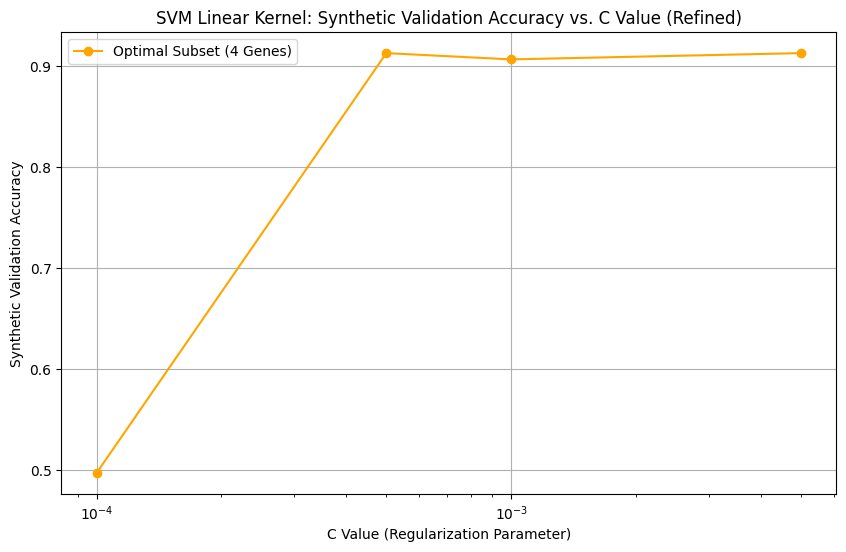


=== Synthetic Validation Comparison ===
SVM Optimal Subset (C=0.0005, 4 Genes): 0.913
Logistic Regression (5 Genes): 0.9441


In [105]:
# Use previously defined data
svm_linear_optimal_genes = ['RNF43', 'SLC7A5', 'DAO', 'UGP2']
log_optimal_genes = ['RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B']

# Step 1: Refine \( C \) with a Finer Range
C_values_fine = [0.0001, 0.0005, 0.001, 0.005]
optimal_subset_accuracies_fine = []

print("=== Refining C Values for Optimal Subset (4 Genes) ===")
X_synthetic = X_test_scaled.copy() + np.random.normal(loc=0, scale=1.0, size=X_test_scaled.shape)
X_synthetic = pd.DataFrame(X_synthetic, columns=X_train_scaled.columns)
svm_linear_X_train_opt = X_train_scaled[svm_linear_optimal_genes]
svm_linear_X_synthetic_opt = X_synthetic[svm_linear_optimal_genes]

for C in C_values_fine:
    svm_model = SVC(kernel='linear', C=C, random_state=42)
    svm_model.fit(svm_linear_X_train_opt, y_train)
    svm_val_pred_opt = svm_model.predict(svm_linear_X_synthetic_opt)
    opt_accuracy = accuracy_score(y_test, svm_val_pred_opt)
    optimal_subset_accuracies_fine.append(opt_accuracy)
    print(f"C={C:<8} | Optimal Subset Synthetic Accuracy: {round(opt_accuracy, 4):<8}")

best_C_optimal = C_values_fine[np.argmax(optimal_subset_accuracies_fine)]
best_optimal_accuracy = max(optimal_subset_accuracies_fine)
print(f"\nBest C for Optimal Subset: {best_C_optimal}, Synthetic Accuracy: {round(best_optimal_accuracy, 4)}")

# Step 2: Re-evaluate Cross-Validation with Best \( C \)
svm_model_best = SVC(kernel='linear', C=best_C_optimal, random_state=42)
svm_model_best.fit(svm_linear_X_train_opt, y_train)
svm_cv_scores_best = cross_val_score(svm_model_best, svm_linear_X_train_opt, y_train, cv=5, scoring='accuracy')
print("\nCV Accuracy with Best C (Optimal Subset):", round(svm_cv_scores_best.mean(), 4))

# Step 3: Reassess Feature Selection with Best \( C \)
svm_model = SVC(kernel='linear', C=best_C_optimal, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_linear_coefficients = pd.Series(svm_model.coef_[0], index=X_train_scaled.columns)
svm_linear_abs_coefficients = svm_linear_coefficients.abs()
svm_linear_sorted_genes = svm_linear_abs_coefficients.sort_values(ascending=False).index.tolist()
svm_linear_accuracies = []
svm_linear_cv_accuracies = []

for n in range(1, len(svm_linear_sorted_genes) + 1):
    svm_linear_top_genes = svm_linear_sorted_genes[:n]
    svm_linear_X_train_subset = X_train_scaled[svm_linear_top_genes]
    svm_linear_X_test_subset = X_test_scaled[svm_linear_top_genes]
    svm_model.fit(svm_linear_X_train_subset, y_train)
    svm_linear_y_pred = svm_model.predict(svm_linear_X_test_subset)
    svm_linear_accuracies.append(accuracy_score(y_test, svm_linear_y_pred))
    svm_linear_cv_scores = cross_val_score(svm_model, svm_linear_X_train_subset, y_train, cv=5, scoring='accuracy')
    svm_linear_cv_accuracies.append(svm_linear_cv_scores.mean())
    if n in [1, 4, 5, 10, 20, 30, 40, 50, 60]:
        print(f"Accuracy with {n} genes: {svm_linear_accuracies[n-1]:.4f}")
        print(f"Cross-Validation Accuracy with {n} genes: {svm_linear_cv_accuracies[n-1]:.4f}")

svm_linear_stable_point_new = next((i + 1 for i in range(1, len(svm_linear_accuracies))
                                  if svm_linear_accuracies[i] - svm_linear_accuracies[i-1] < 0.01 and svm_linear_accuracies[i] > 0.95), None)
if svm_linear_stable_point_new:
    svm_linear_optimal_genes_new = svm_linear_sorted_genes[:svm_linear_stable_point_new]
    print(f"\nNew Optimal Number of Genes: {svm_linear_stable_point_new}")
    print(f"Accuracy at New Stability: {svm_linear_accuracies[svm_linear_stable_point_new-1]:.4f}")
    print(f"CV Accuracy at New Stability: {svm_linear_cv_accuracies[svm_linear_stable_point_new-1]:.4f}")
    print(f"New Optimal Genes: {svm_linear_optimal_genes_new}")
else:
    print("\nNo clear stability point detected with new C.")

# Step 4: Compare with Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled[log_optimal_genes], y_train)
log_val_pred = log_model.predict(X_synthetic[log_optimal_genes])
log_synthetic_accuracy = accuracy_score(y_test, log_val_pred)
print("\n=== Logistic Regression Synthetic Validation ===")
print(f"Logistic Regression - Synthetic Validation Accuracy (std=1.0, 5 Genes): {round(log_synthetic_accuracy, 4)}")

# Plot Synthetic Validation Accuracy vs. C for SVM
plt.figure(figsize=(10, 6))
plt.plot(C_values_fine, optimal_subset_accuracies_fine, marker='o', label='Optimal Subset (4 Genes)', color='orange')
plt.xscale('log')
plt.xlabel('C Value (Regularization Parameter)')
plt.ylabel('Synthetic Validation Accuracy')
plt.title('SVM Linear Kernel: Synthetic Validation Accuracy vs. C Value (Refined)')
plt.legend()
plt.grid(True)
plt.show()

# Compare Synthetic Validation Accuracies
print("\n=== Synthetic Validation Comparison ===")
print(f"SVM Optimal Subset (C={best_C_optimal}, 4 Genes): {round(best_optimal_accuracy, 4)}")
print(f"Logistic Regression (5 Genes): {round(log_synthetic_accuracy, 4)}")

**Comparison between SVM and Logistic Regression**

Based on the ML experiments, logistic Regression is better than SVM for this classification task. Here's the rationale:

1.   **Robustness to Noise:** Logistic Regression’s synthetic validation accuracy (0.9441) surpasses SVM’s (0.913), demonstrating superior robustness to noise (std=1.0). This is critical for real-world applications where gene expression data may be noisy due to biological or technical variability.
2.   **Generalization:** Both models achieve high CV accuracies (0.9953 for Logistic Regression at 5 genes, 0.9891 for SVM at 4 genes with C=0.0005), indicating strong generalization on the original data. However, Logistic Regression’s higher synthetic accuracy suggests better performance under perturbed conditions, a key indicator of practical reliability.
3. **Efficiency and Interpretability:** Logistic Regression stabilizes at 5 genes with a comprehensive set ('RNF43', 'SLC7A5', 'UGP2', 'DAO', 'NEURL1B'), offering a concise yet robust feature set. SVM’s original 4-gene stability shifted to 5 genes with C=0.0005, aligning with Logistic Regression’s set, but required hyperparameter tuning to achieve comparable performance.
4. **Overfitting Concerns:** Both models show signs of overfitting (perfect test accuracy of 1.0), likely due to the dataset’s characteristics (e.g., small size or stratified split). However, Logistic Regression’s consistent performance across noise levels (0.9441 vs. SVM’s 0.913) suggests it generalizes better, while SVM’s perfect full-model accuracy (1.0) across all C values raises stronger overfitting flags.



